In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import os

In [2]:
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### Load Data

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 119 files belonging to 3 classes.


In [5]:
class_names = data.class_names
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [6]:
print(class_names[0])
print(class_names[1])
print(class_names[2])

Bacterial leaf blight
Brown spot
Leaf smut


In [7]:
len(data)

4

In [8]:
for image_batch, label_batch in data.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 2 0 1 0 2 1 1 0 2 1 2 0 2 0 2 0 0 2 2 1 0 2 0 1 1 0 0 1 2 0 2]


In [9]:
print(image_batch[0].shape)

(256, 256, 3)


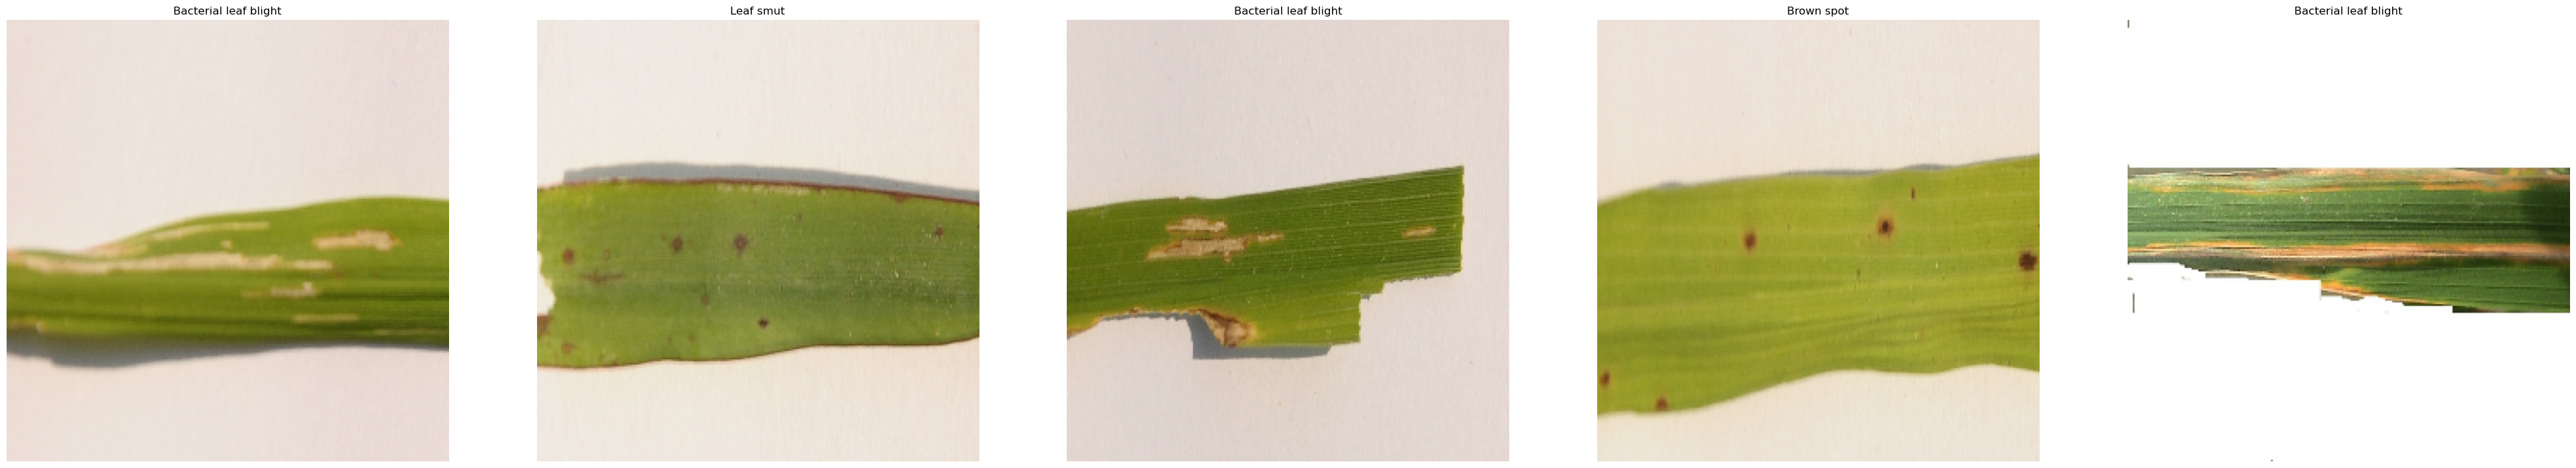

In [10]:
plt.figure(figsize=(50,50))
for i in range(5):
    ax= plt.subplot(1,5,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

### Split Data

In [11]:
len(data)

4

In [12]:
train_size= int(len(data)*.7)
val_size= int(len(data)*.2)+1
test_size= int(len(data)*.1)+1

In [13]:
print(train_size)
print(val_size)
print(test_size)

2
1
1


In [14]:
train_ds= data.take(train_size)
val_ds= data.skip(train_size).take(val_size)
test_ds= data.skip(train_size+ val_size).take(test_size)

In [15]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

2
1
1


In [16]:
rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

### Build Deep Learning Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [18]:
model= Sequential()

In [19]:
model = models.Sequential([
    rescale
])

In [20]:
model.add(Conv2D(16,(3,3),1,activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3,activation='softmax'))


In [21]:
model.build(input_shape= (32, 256, 256, 3))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 32)         

In [23]:
model.compile('adam', loss = tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [24]:
hist = model.fit(train_ds, epochs=40, validation_data= val_ds)

Epoch 1/40
2/2 [==============================] - 3s 1s/step - loss: 2.4272 - accuracy: 0.2969 - val_loss: 1.6049 - val_accuracy: 0.2500
Epoch 2/40
2/2 [==============================] - 2s 840ms/step - loss: 1.2431 - accuracy: 0.4062 - val_loss: 1.3236 - val_accuracy: 0.2500
Epoch 3/40
2/2 [==============================] - 2s 839ms/step - loss: 1.2513 - accuracy: 0.2969 - val_loss: 1.0399 - val_accuracy: 0.4375
Epoch 4/40
2/2 [==============================] - 2s 903ms/step - loss: 1.0723 - accuracy: 0.3281 - val_loss: 1.0086 - val_accuracy: 0.4062
Epoch 5/40
2/2 [==============================] - 2s 870ms/step - loss: 1.0064 - accuracy: 0.5000 - val_loss: 0.9689 - val_accuracy: 0.5625
Epoch 6/40
2/2 [==============================] - 2s 920ms/step - loss: 0.9594 - accuracy: 0.5469 - val_loss: 0.9482 - val_accuracy: 0.5625
Epoch 7/40
2/2 [==============================] - 2s 927ms/step - loss: 0.9021 - accuracy: 0.5625 - val_loss: 0.8478 - val_accuracy: 0.7188
Epoch 8/40
2/2 [=======

In [25]:
scores = model.evaluate(test_ds)

1/1 [==============================] - 0s 343ms/step - loss: 0.0060 - accuracy: 1.0000


In [26]:
scores 

[0.005972706712782383, 1.0]

#### Plot Performance

In [27]:
acc= hist.history['accuracy']
val_acc= hist.history['val_accuracy']

loss= hist.history['loss']
val_loss= hist.history['val_loss']

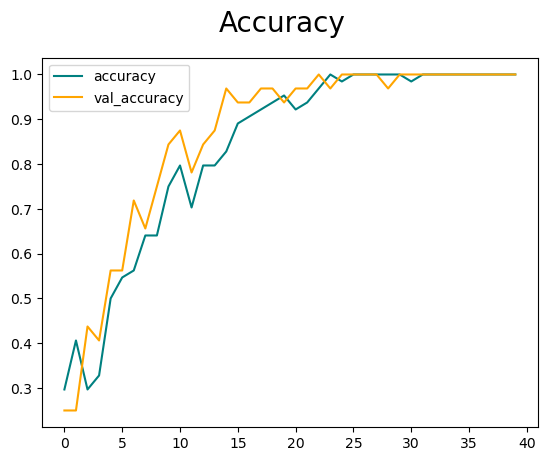

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

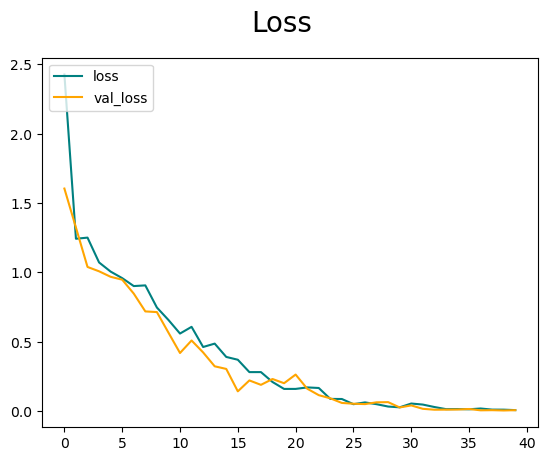

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Making Some Predictions

First image to predict
Actual label: Brown spot
1/1 [==============================] - 0s 79ms/step
Predicted label: Brown spot


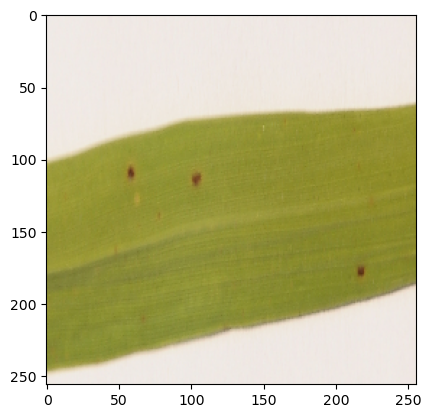

In [33]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])